# Using Jupyter notebooks

We will here go over the basics of using Jupyter notebooks with a focus on carrying out and analyzing quantum chemical calculations as well as different functions and routines that are used in eChem.

```{tip}
At first glance, the function calls and figures in the eChem book can appear a bit complicated. We stress that you *do not* need to remember each function call, or necessarily understand the exact details. Instead, start by copying code cells and notebooks that you are interested in and start experimenting.

*Playing around is often one of the best ways to learn!*
```

## Cell types

A Jupyter notebook consists of a number of different cells which can be executed in any order, the most relevant being:

- **Markdown**, where you write text and equations, insert hyperlinks, figures, and more

- **Code**, which contains executable (Python) code

A cell is executed by marking the cell and pressing `shift`+`enter`, or the `run` botton at the top. For a markdown cell this formats the text, and for code cells it runs the code. You can also press `ctrl`+`enter`, which only runs the cell, while `shift`+`enter` runs the cell and then selects the next one. Results from cells are saved in memory, so it is often a good idea to separate complicated workflows into several blocks, *e.g.* performing heavy calculations in one block and doing post-processing in another block.

The cell-type is selected in a scroll-down window at the top of the notebook window, which for this cell is `Markdown`. For editing the formatted markdown cells you double-click on the text, which changes the format to plain text.

### Markdown cells

[Markdown](https://www.markdownguide.org/) is a lightweight language for creating formatted code, with syntax examples including:

---

```
# Heading 1

## Heading 2

### Heading 3

#### Heading 4
```

Results in headings of different levels, which are in a Jupyter book visible to the right.

---


```
You can write text
in **bold** or *italics*, and have

line breaks like this.
```

You can write text in
**bold** or *italics*, and have

line breaks like this.

---

```
- Subject 1
    1. Detail 1
    2. Detail 2
- Subject 2
    - Another detail
1. New subject 1
```

- Subject 1
    1. Detail 1
    2. Detail 2
- Subject 2
    - Another detail
1. New subject 1

---


```
Can link to [wikipedia](https://www.wikipedia.org/).
```

Can link to [wikipedia](https://www.wikipedia.org/).

---


```
Equations can be written with similar syntax as Latex, *e.g.*

$$
\overline{F} = m \overline{a}
$$

as well as in sentences, such as $\overline{F} = m \overline{a}$.
```


Equations can be written with similar syntax as Latex, *e.g.*

$$
\overline{F} = m \overline{a}
$$

as well as in sentences, such as $\overline{F} = m \overline{a}$.


---


```
![echem](../img/logo.png)
```

![echem](../img/logo.png)


---

Markdown cells are used throughout eChem, and the above examples should cover the main functionalities you need to be familiar with. More examples can be found [here](https://www.markdownguide.org/basic-syntax).

### Code cells

Code cells are written in Python, for which tutorials can be found, *e.g.*, [here](https://docs.python.org/3/tutorial/) and [here](https://www.w3schools.com/python/).

```{note}
The fact that cells can be executed in any order may lead to some confusion on the dependencies between different cells. Remember to make sure that functions are defined and calculations are run before they are used, and it is good practice to restart the notebook and run all cells regularly or when problems occur. 
```

As a basic example, we define a function in one cell (saving it in memory), and call this function in a different cell.

In [1]:
def sum_numbers(a, b):
    return a + b

In [2]:
sum_numbers(1, 2.0)

3.0

Assigning this to a variable and printing the results:

In [3]:
a = 1
b = 2.0
n_sum = sum_numbers(a, b)
print(n_sum)

3.0


Note that Python automatically assign variable type, and here understands that an integer and a float can be added together by converting the integer to a float.

We can print this with more advanced formatting, and add comments (`#`) in the code cells:

In [4]:
print(f"The sum of {a} and {b} is {n_sum}")

# tweaking position, number of decimals, and notation format
print(f"The sum of {a:2d} and {b:5.4f} is {n_sum:.2E}")

The sum of 1 and 2.0 is 3.0
The sum of  1 and 2.0000 is 3.00E+00


If you have the `jupyterlab_code_formatter` package installed (included in the eChem environment), you can format the code cells by running the `Format notebook` command at the top of the window (between cell type selection and the clock symbol). This will, for instance, take the following code cell:

```python
import numpy as np
import matplotlib.pyplot as plt


import veloxchem as vlx
call_funtion(argument1, argument2,argument3,   argument4,argument5) # commenting this function
```

And reformat this to a to:

```python
import matplotlib.pyplot as plt
import numpy as np
import veloxchem as vlx

call_funtion(
    argument1, argument2, argument3, argument4, argument5
)  # commenting this function
```

## Python ecosystem

One of the advantages of Python is the extensive number of available modules and packages, with some examples including:

- `numpy`: large collection of mathematical functionalities
- `matplotlib`: library for plotting
- `scipy`: library for scientific and technical computing
- `veloxchem`: quantum chemical program
- `py3Dmol`: for visualizing molecules

These modules can be loaded as a whole (often being given an alias to avoid function collisions and overwriting), or by loading specific functions. Loading the required modules for this notebook:

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import py3Dmol as p3d
import scipy
import veloxchem as vlx

[thomas-Latitude-5580:36612] mca_base_component_repository_open: unable to open mca_btl_openib: librdmacm.so.1: cannot open shared object file: No such file or directory (ignored)


* Warning * Environment variable OMP_NUM_THREADS not set.
* Warning * Setting OMP_NUM_THREADS to 4.


````{note}
For Windows users and other users experiencing issues with the VeloxChem calculations not running properly, it is likely this is due to OpenMP conflict. These can be be resolved using a temporary solution described [here](sec:openmp_issues), *i.e.* by changing the module load to:

```python
import matplotlib.pyplot as plt
import numpy as np
import py3Dmol as p3d
import scipy
import veloxchem as vlx
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"
```
````

Functionalities from the packages are then used by calling the appropriate package and function, *e.g.* to print the value of $\pi$ we run:

In [6]:
print(np.pi)

3.141592653589793


## Molecular structure

Moving on to calculations of chemical systems, we consider water represented by the following xyz-string with atomic coordinates given in Ångström.

In [5]:
water_xyz = """3 

O       0.0000000000     0.1178336003     0.0000000000
H      -0.7595754146    -0.4713344012    -0.0000000000
H       0.7595754146    -0.4713344012     0.0000000000
"""

Create a [VeloxChem](https://veloxchem.org/docs/intro.html) `molecule` object.

In [6]:
molecule = vlx.Molecule.read_xyz_string(water_xyz)

### Visualize

The molecule can be [visualized](https://kthpanor.github.io/echem/docs/visualize/struct_vis.html) using the `show` method. The resulting illustration that can be rotated and zoomed.

In [7]:
molecule.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

## Electronic structure

The electronic structure of a molecule can be calculated using VeloxChem. A basis set needs to be specified.

In [8]:
basis = vlx.MolecularBasis.read(molecule, "6-31G", ostream=None)

Details about the adopted basis set for this system can be obtained with the `get_string` method.

In [9]:
print(basis.get_string('Atomic Basis'))

Molecular Basis (Atomic Basis)

Basis: 6-31G                                                

  Atom Contracted GTOs           Primitive GTOs                

  O   (3S,2P)                   (10S,4P)                      
  H   (2S)                      (4S)                          

Contracted Basis Functions : 13                             
Primitive Basis Functions  : 30                             




### Perform SCF calculations

Next, set up a (restricted) SCF driver and perform a [SCF](https://kthpanor.github.io/echem/docs/elec_struct/hartree-fock.html#scf-procedure) calculation:

In [10]:
scf_drv = vlx.ScfRestrictedDriver()
scf_drv.ostream.mute()

scf_results = scf_drv.compute(molecule, basis)

```{tip}
If you want to print the full output in your notebook then remove the `ostream.mute()` statement.

If the output of any cell (or the cell itself) is long, you can collapse it by pressing the blue bar to the left, visible when a cell is selected. 

You can also right-click and activate `Enable Scrolling for Outputs` for the cell.
``` 

Results are stored in the `scf_drv` and `scf_results` objects and can be used for analysis, further calculations, and more. In order to better understand what an object is and what it contains, we can run:

In [11]:
scf_drv?

Type:           ScfRestrictedDriver
String form:    <veloxchem.scfrestdriver.ScfRestrictedDriver object at 0x7f2f90d4d4d0>
File:           ~/miniconda3/envs/echem/lib/python3.11/site-packages/veloxchem/scfrestdriver.py
Docstring:     
Implements spin restricted closed shell SCF method with C2-DIIS and
two-level C2-DIIS convergence accelerators.

:param comm:
    The MPI communicator.
:param ostream:
    The output stream.
Init docstring:
Initializes spin restricted closed shell SCF driver to default setup
(convergence threshold, initial guess, etc) by calling base class
constructor.

This returns the docstring and some basic information on the object. You can get more extensive information by running `help(scf_drv)`:

In [12]:
help(scf_drv)

Help on ScfRestrictedDriver in module veloxchem.scfrestdriver object:

class ScfRestrictedDriver(veloxchem.scfdriver.ScfDriver)
 |  ScfRestrictedDriver(comm=None, ostream=None)
 |  
 |  Implements spin restricted closed shell SCF method with C2-DIIS and
 |  two-level C2-DIIS convergence accelerators.
 |  
 |  :param comm:
 |      The MPI communicator.
 |  :param ostream:
 |      The output stream.
 |  
 |  Method resolution order:
 |      ScfRestrictedDriver
 |      veloxchem.scfdriver.ScfDriver
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __deepcopy__(self, memo)
 |      Implements deepcopy.
 |      
 |      :param memo:
 |          The memo dictionary for deepcopy.
 |      
 |      :return:
 |          A deepcopy of self.
 |  
 |  __init__(self, comm=None, ostream=None)
 |      Initializes spin restricted closed shell SCF driver to default setup
 |      (convergence threshold, initial guess, etc) by calling base class
 |      constructor.
 |  
 |  get_scf_type_str(

Finally, in order to see which instances and functions can be accessed, you can use auto-completion by writing `scf_drv.` and pressing tab. This shows all options with the same start as what you have written in a scroll-down window. For example, you can find a function called `get_scf_energy`, which returns the SCF energy:

In [13]:
print(scf_drv.get_scf_energy())

-75.98387037576924


### Visualize molecular orbitals

[Molecular orbitals](elec_struct/orbitals) can be [visualized](https://kthpanor.github.io/echem/docs/visualize/orb_vis.html) using a light-weight, interactive function called `OrbitalViewer`. A `viewer` object is initiated, and provided information on the molecular structure, basis set, and SCF:

In [14]:
viewer = vlx.OrbitalViewer()
viewer.plot(molecule, basis, scf_drv.mol_orbs)

Output()

Dropdown(description='Orbital:', index=4, options=(('  1 occ=2.000 ene=-20.561', 0), ('  2 occ=2.000 ene=-1.35…

This results in seven molecular orbitals (selected by drop-down menu at the lower left), as the use of a minimal basis set (STO-3G) yields one basis function per hydrogen (1s), and five basis functions for oxygen (1s, 2s, and three 2p). You can change the visualization options in the upper right menu, with, *e.g.*, the selected isosurface values under `Objects>Orbitals>...` (positive/negative isosurfaces are treated individually).

```{note}
`OrbitalViewer` is an interactive viewer, and will not be able to change the MO to visualize in the compiled e-book. It will work in a notebook, though.
```

### Basis set effects

Next, let us consider impact of different [basis sets](https://kthpanor.github.io/echem/docs/elec_struct/orbitals.html#basis-sets-of-atomic-orbitals) on the total energy, and see if there are any general trends for increasing basis set sizes. First, define a function which takes a molecular structure and basis set, and return the SCF energy and number of basis functions:

In [15]:
def calc_scf(xyz, basis):
    molecule = vlx.Molecule.read_xyz_string(xyz)
    basis = vlx.MolecularBasis.read(molecule, basis, ostream=None)
    n_bas = basis.get_dimensions_of_basis()
    scf_drv = vlx.ScfRestrictedDriver()
    scf_drv.ostream.mute()
    scf_results = scf_drv.compute(molecule, basis)
    scf_energy = scf_drv.get_scf_energy()
    return scf_energy, n_bas

## Python lists

Create two empty `lists` for storing SCF energies and basis set sizes:

In [16]:
scf_energies = []
basis_size = []

Python lists are collections of elements (numbers, strings, other lists, ...), which can be modified. A list can be created by placing these elements within brackets, *e.g*:

In [17]:
list_example = [0.0, "Cat", np.pi, ["dog", np.e]]

The individual elements can be called:

In [18]:
print(list_example[0])
print(list_example[1] + " and " + list_example[3][0])

0.0
Cat and dog


Or using a `for` loop:

In [19]:
for example in list_example:
    print(example)

0.0
Cat
3.141592653589793
['dog', 2.718281828459045]


Next, calculate the SCF energies and basis set sizes when using the following basis sets:

- STO-3G   
- 6-31G
- 6-311G
- 6-31++G**
- 6-311++G**
    
Details on what the basis set designations mean can be found elsewhere, *e.g.* [here](elec_struct/orbitals.ipynb#basis-set-library) or in [wikipedia](https://en.wikipedia.org/wiki/Basis_set_(chemistry)). Create a list of basis set strings and run `calc_scf`:

In [20]:
basis_sets = ["STO-3G", "6-31G", "6-311G", "6-31++G**", "6-311++G**"]
for basis_set in basis_sets:
    energy_tmp, n_bas_tmp = calc_scf(water_xyz, basis_set)
    scf_energies.append(energy_tmp)
    basis_size.append(n_bas_tmp)

```{tip}
Should the calculation hang up/take too long, you can restart it with `kernel > restart`.
```

## Plotting results

Next, construct a basic figure by initiating a `figure` object, plot the basis set size and SCF energy, and show the results:

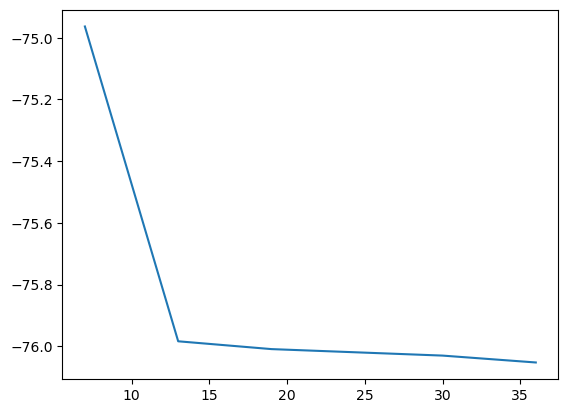

In [24]:
plt.figure()
plt.plot(basis_size, scf_energies)
plt.show()

Tweaking the plot setting for a more appealing figure:

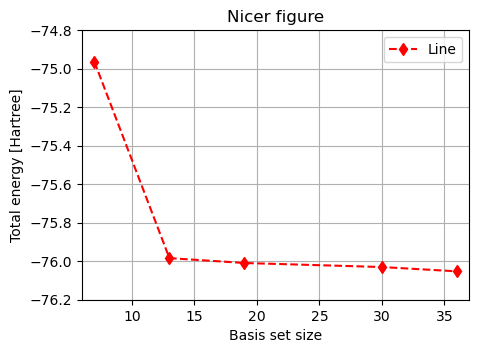

In [21]:
plt.figure(figsize=(5, 3.5)) # Tweak figure size
plt.title("Nicer figure") # Title

# plot circles at points, connected with a dashed line:
plt.plot(basis_size, scf_energies, "d--", color='red', label="Line")

plt.legend() # insert legend, using defined label
plt.xlim((6.0, 37.0)) # limits of x-axis
plt.ylim((-76.2, -74.8)) # limits of y-axis
plt.grid() # Include a grid
plt.xlabel("Basis set size")
plt.ylabel("Total energy [Hartree]")
plt.show()

It is clear that the total energy decrease with basis set size, as a larger basis set generally provide more flexibility. This is not always the case, as smaller basis sets can be more suitable for describing a particular electronic structure.

## Potential energy surfaces

An important concept in computational chemistry is that of the [potential energy surface (PES)](https://en.wikipedia.org/wiki/Potential_energy_surface), which describe the energy of a system as a function of some parameter (typically atomic positions). We here wish to construct this for carbon monoxide, by tracking the total energy as a function of the bond length.


### Constructing a PES

In order to create a list of bond distances we can use `np.arange` or `np.linspace`, which returns evenly spaced values within a given interval. These values are returned using either a specified step length (`np.arange`), or a specified number of steps (`np.linspace`). Note that `np.arange` gives values up to, but not including, the end point.

In [26]:
print("np.arange:")
print(np.arange(10.0))
print(np.arange(start=1.0, stop=10.0, step=2.0))
print()
print("np.linspace:")
print(np.linspace(0.0, 10.0, 3))
print(np.linspace(start=1.0, stop=10.0, num=6))

np.arange:
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[1. 3. 5. 7. 9.]

np.linspace:
[ 0.  5. 10.]
[ 1.   2.8  4.6  6.4  8.2 10. ]


We write `10.0` instead of `10` to ensure that Python understand that we want float numbers.

For calculating the PES we will use the `replace` command, which works as follows:

In [27]:
start_str = "John went bowling with Jane."
print(start_str)

end_str = start_str.replace("John", "Andrew")
end_str = end_str.replace("bowling", "to the cinema")
end_str = end_str.replace("Jane", "Sarah")
print(end_str)

John went bowling with Jane.
Andrew went to the cinema with Sarah.


Next, we use `np.arange`, `replace`, and `calc_scf` to create the PES.

In [28]:
co_base = """2

O       0.0       0.0       0.0
C         L       0.0       0.0
"""

bond_e = []
bond_l = np.arange(1.00, 1.40, 0.04)

for l in bond_l:
    co_tmp = co_base.replace("L", "{}".format(l))  # change C position
    energy_tmp, n_bas_tmp = calc_scf(co_tmp, "STO-3G")
    bond_e.append(energy_tmp)

* Info * Reading basis set from file: /Users/panor/miniconda3/envs/echem/lib/python3.11/site-packages/veloxchem/basis/STO-3G
                                                                                                                          
                                              Molecular Basis (Atomic Basis)                                              
                                                                                                                          
                               Basis: STO-3G                                                                              
                                                                                                                          
                               Atom Contracted GTOs           Primitive GTOs                                              
                                                                                                                          
              

Plot the resulting PES:

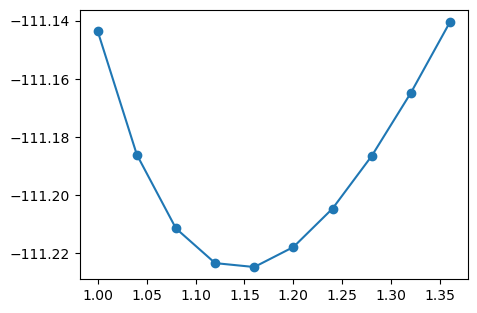

In [29]:
plt.figure(figsize=(5, 3.5))
plt.plot(bond_l, bond_e, "o-")
plt.show()

### Interpolation with spline

A smoother, more aesthetically pleasing figure line can be constructed by using [spline](https://en.wikipedia.org/wiki/Spline_(mathematics)), which interpolate between data points with piece-wise polynomials of a desired order. A cubic spline tends to yield relatively smooth curves, and can be constructed as:

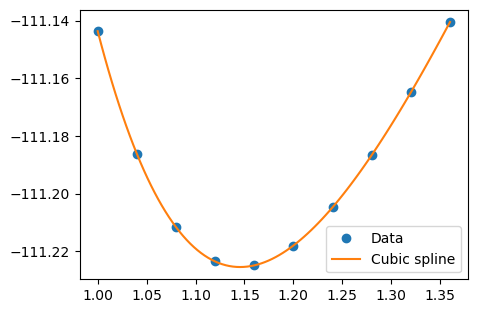

In [30]:
plt.figure(figsize=(5, 3.5))
plt.plot(bond_l, bond_e, "o")
spline_func = scipy.interpolate.interp1d(bond_l, bond_e, kind="cubic")
x_spline = np.linspace(min(bond_l), max(bond_l), 100)
y_spline = spline_func(x_spline)
plt.plot(x_spline, y_spline)
plt.legend(("Data", "Cubic spline"))
plt.show()

### Fit harmonic function

The change in energy by bond stretch can be approximated as a harmonic potential:

$$
E_k = \frac{k_s}{2} \left( l - l_0\right)^2
$$

Such potential fits can be used to form a [force field](mol_struct/forcefields) which are then used for [molecular dynamics](mol_struct/md). In order to do this, we will use `scipy.optimize.curve_fit` for optimizing the parameters. For this, we shift the energy so that the minima is zero and define the function to be fitted:

In [31]:
bond_e_shifted = np.array(bond_e) - min(bond_e)


def harmonic_func(l, l_0, k_s):
    return (k_s / 2.0) * (l - l_0) ** 2

Optimize the parameters and plot the results:

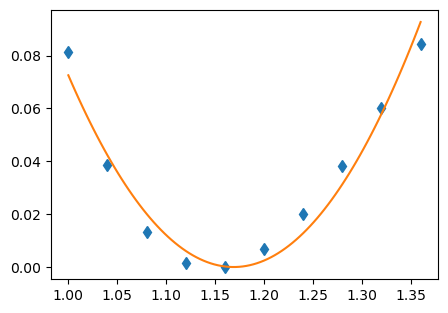

In [32]:
popt, pcov = scipy.optimize.curve_fit(harmonic_func, bond_l, bond_e_shifted)

plt.figure(figsize=(5, 3.5))
plt.plot(bond_l, bond_e_shifted, "d")
l = np.linspace(min(bond_l), max(bond_l), 100)
plt.plot(l, harmonic_func(l, *popt))
plt.show()

This fit takes the approximate shape of the calculate PES, but with a minima in the wrong location and an incorrect shape. This is due to a number of factor, including the inadequacies of a harmonic potential and fitting it to a somewhat unsuitable region, as discussed more [here](https://kthpanor.github.io/echem/docs/mol_struct/forcefields.html#bond-stretching).

## Functions and examples

### Einstein summation

This e-book and our software makes use of `np.einsum` as a simple tool for performing [Einstein summation](https://en.wikipedia.org/wiki/Einstein_notation), which is descried in the [manual](https://numpy.org/doc/stable/reference/generated/numpy.einsum.html), and with basic examples found [here](https://ajcr.net/Basic-guide-to-einsum/).

Consider a vector A and a matrix B:

In [33]:
A = np.array([0, 1, 2])
B = np.array([[1, 1, 3], [3, 4, 5], [5, 6, 7]])

print("A:\n", A)
print("\nB:\n", B)
# \n adds a new line

A:
 [0 1 2]

B:
 [[1 1 3]
 [3 4 5]
 [5 6 7]]


Say that we want to perform this operation:

$$
C_i = \sum_j A_iB_{ij}
$$

In `np.einsum` this can be performed in a single step:

In [34]:
print(np.einsum("i,ij->i", A, B))

[ 0 12 36]


Here $i$ and $j$ select axis in the objects, and you can change the indices to any letter (provided you use them consistently). The operation carried out takes all $A_i$ and multiply with $B_{ij}$, summing over $j$ and returning a new object with elements along $i$. Removing the $i$ on the right-hand side instead gives the total sum:

In [35]:
print(np.einsum("i,ij->", A, B))

48


In other words, repeating an index tells `np.einsum` that it should multiply the objects along these dimensions, and omitting on the right-hand side tells it to sum along that dimension.

This can be used for simpler operations such as taking the sum of an object, performing element-wise multiplication, calculating the trace, and more. It can also be used for more complicated matrix-matrix operations and considering more arrays, and we will use it to perform a transformation from atomic to molecular orbitals (AO and MO, respectively).


### AO to MO transformation

[Integrals](elec_struct/integrals) are calculate in an atomic orbital (AO) basis, while we would in most cases prefer to work in the molecular orbital (MO) basis. For this, we then need to perform an AO to MO transformation. As an example, consider the expectation value of the kinetic energy:

$$
    \langle \hat{T} \rangle = 
    2 \sum_{i}^\mathrm{occ} T_{ii}
$$

First, calculate the SCF of water with a minimal basis:

In [36]:
molecule = vlx.Molecule.read_xyz_string(water_xyz)
basis = vlx.MolecularBasis.read(molecule, "STO-3G")

* Info * Reading basis set from file: /Users/panor/miniconda3/envs/echem/lib/python3.11/site-packages/veloxchem/basis/STO-3G
                                                                                                                          
                                              Molecular Basis (Atomic Basis)                                              
                                                                                                                          
                               Basis: STO-3G                                                                              
                                                                                                                          
                               Atom Contracted GTOs           Primitive GTOs                                              
                                                                                                                          
              

From VeloxChem we have access to $T_{\alpha\beta}$ in the AO basis:

In [37]:
T_ao = vlx.compute_kinetic_energy_integrals(molecule, basis)

Run the SCF to get the number of occupied orbitals and MO coefficient matrix:

In [22]:
scf_drv = vlx.ScfRestrictedDriver()
scf_drv.ostream.mute()
scf_results = scf_drv.compute(molecule, basis)

nocc = molecule.number_of_alpha_electrons()
C = scf_results["C_alpha"]

We calculate the elements of the kinetic energy operator from the transformation:

$$
T_{pq} = (p|\hat{T}|q) = \sum_{\alpha,\beta} C^*_{\alpha p} C_{\beta q} \, T_{\alpha\beta}
$$

The MO coefficient matrix $\mathbf{C}$ is real, so you can here ignore the complex conjugate.

We will use `np.einsum` to construct $T_{pq}$, and use the results to calculate the expectation value of the kinetic energy operator from before. For we need to know how to [slice](https://www.w3schools.com/python/numpy/numpy_array_slicing.asp) NumPy arrays.

As an example, the orbital energies are extracted as:

In [39]:
orbital_energies = scf_results["E_alpha"]
print(orbital_energies)

[-20.24238972  -1.26646064  -0.61558541  -0.45278475  -0.39106556
   0.60181634   0.73720765]


To print the energy of the occupied and unoccupied orbitals we use splicing:

In [40]:
print("Energy of occupied:\n", orbital_energies[:nocc])
print("Energy of unoccupied:\n", orbital_energies[nocc:])

Energy of occupied:
 [-20.24238972  -1.26646064  -0.61558541  -0.45278475  -0.39106556]
Energy of unoccupied:
 [0.60181634 0.73720765]


When using `np.einsum`, look at the above equation and use this to guide the construction of the operation, following the same order of indices and variable (but interchanging the left- and right-hand sides). The order is $pq$ on the left-hand side, and $\alpha p$, $\beta q$, and $\alpha \beta$ on the right-hand side, so the summation becomes:

In [41]:
T_mo = np.einsum("ap, bq, ab -> pq", C, C, T_ao)

Finally, the expectation value of the kinetic operator is:

In [42]:
T_exp = 2 * np.einsum("ii", T_mo[:nocc, :nocc])
print(f"Expectation value: {T_exp:.3f} Hartree")

Expectation value: 74.579 Hartree


### Eigenvalues and eigenvectors

The eigenvalues and eigenvectors of a Hermitian matrix can be calculated with `np.linalg.eigh()`, and as an example we consider the [overlap matrix](https://kthpanor.github.io/echem/docs/elec_struct/orbitals.html#overlap-matrix) ($\mathbf{S}$). This is constructed from the overlap between each pair of orbitals:

$$
S_{\alpha\beta} = \langle \chi_{\alpha} | \chi_{\beta} \rangle
$$


The overlap matrix is available as:

In [43]:
S = scf_results["S"]
print(np.around(S, 3))  # Rounding to three decimals

[[ 1.     0.237  0.053  0.053  0.     0.     0.   ]
 [ 0.237  1.     0.472  0.472  0.     0.     0.   ]
 [ 0.053  0.472  1.     0.25  -0.24   0.    -0.31 ]
 [ 0.053  0.472  0.25   1.    -0.24   0.     0.31 ]
 [ 0.     0.    -0.24  -0.24   1.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     1.     0.   ]
 [ 0.     0.    -0.31   0.31   0.     0.     1.   ]]


When constructing an orthogonal AO basis (see [here](https://kthpanor.github.io/echem/docs/elec_struct/hf_scf.html#orthogonalization-of-the-ao-basis)) we diagonalize the overlap matrix:

$$
\mathbf{S}_\mathrm{diag} = \mathbf{U}^\dagger \mathbf{S} \mathbf{U}
$$

$\mathbf{U}$ collects the eigenvectors of $\mathbf{S}$ as columns, which can be found using `np.linalg.eigh`:


In [44]:
s, U = np.linalg.eigh(S)

print("Eigenvalues:\n", np.around(s, 3))
print()  # print empty line
print("Eigenvectors:\n", np.around(U, 3))

Eigenvalues:
 [0.345 0.42  0.886 1.    1.093 1.331 1.926]

Eigenvectors:
 [[-0.18  -0.    -0.713  0.     0.644 -0.     0.209]
 [ 0.695  0.     0.279  0.     0.313 -0.     0.584]
 [-0.437 -0.564  0.145  0.    -0.131 -0.426  0.52 ]
 [-0.437  0.564  0.145  0.    -0.131  0.426  0.52 ]
 [-0.321 -0.     0.609  0.     0.673 -0.    -0.27 ]
 [ 0.     0.     0.    -1.     0.     0.     0.   ]
 [ 0.    -0.602  0.     0.     0.     0.798  0.   ]]


$\mathbf{S}_\mathrm{diag}$ can be constructed using the eigenvectors and `np.matmul`:

In [45]:
S_diag = np.matmul(np.matmul(U.T, S), U)

print(np.around(S_diag, 3))

[[ 0.345 -0.     0.     0.     0.    -0.     0.   ]
 [-0.     0.42  -0.     0.    -0.    -0.     0.   ]
 [ 0.    -0.     0.886  0.     0.    -0.     0.   ]
 [ 0.     0.     0.     1.     0.     0.     0.   ]
 [ 0.    -0.     0.     0.     1.093 -0.    -0.   ]
 [-0.    -0.    -0.     0.    -0.     1.331 -0.   ]
 [ 0.     0.     0.     0.    -0.    -0.     1.926]]


Next, verify that $\mathbf{U}^\dagger \mathbf{U} = \mathbf{1}$:

In [46]:
print(np.around(np.matmul(U.T, U), 5))

[[ 1.  0.  0.  0.  0.  0. -0.]
 [ 0.  1. -0.  0. -0.  0.  0.]
 [ 0. -0.  1.  0.  0. -0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.]
 [ 0. -0.  0.  0.  1. -0.  0.]
 [ 0.  0. -0.  0. -0.  1. -0.]
 [-0.  0.  0.  0.  0. -0.  1.]]


Next, we can construct the diagonal matrix using the eigenvalues in $s$ and verify that it gives the same results as above.

For an identity matrix of dimension `n` we use `np.identity(n)`.

In [47]:
print(np.around(s * np.identity(len(s)), 3))
print()
abs_diff = np.abs(s * np.identity(len(s)) - S_diag)
print(f"Summed absolute difference: {np.sum(abs_diff): .4E}")

[[0.345 0.    0.    0.    0.    0.    0.   ]
 [0.    0.42  0.    0.    0.    0.    0.   ]
 [0.    0.    0.886 0.    0.    0.    0.   ]
 [0.    0.    0.    1.    0.    0.    0.   ]
 [0.    0.    0.    0.    1.093 0.    0.   ]
 [0.    0.    0.    0.    0.    1.331 0.   ]
 [0.    0.    0.    0.    0.    0.    1.926]]

Summed absolute difference:  5.7106E-15


### Dictionaries

Dictionaries are ordered collections of items, arranges in pairs of `key` and `value`:

In [48]:
some_dict = {"fruit": "apple", "color": "red"}

print("Print keys:")
print(some_dict.keys())

print("\nPrint values:")
print(some_dict.values())

print("\nPrint specific value:")
print(some_dict["color"])

Print keys:
dict_keys(['fruit', 'color'])

Print values:
dict_values(['apple', 'red'])

Print specific value:
red


You can change values and add more keys:

In [49]:
some_dict["color"] = "green"
print(some_dict.values())
print()
some_dict["freshness"] = "ripe"
print(some_dict.keys())
print()
print(some_dict.values())

dict_values(['apple', 'green'])

dict_keys(['fruit', 'color', 'freshness'])

dict_values(['apple', 'green', 'ripe'])


The elements of a dictionary can be another dictionary:

In [50]:
some_dict["dimensions"] = {"length": 4.5, "width": 4.3, "height": 5.2}
print(some_dict.values())

dict_values(['apple', 'green', 'ripe', {'length': 4.5, 'width': 4.3, 'height': 5.2}])


In [51]:
x = some_dict["dimensions"]
print(x)
print()
print(x.keys())
print()
print(x["width"])

{'length': 4.5, 'width': 4.3, 'height': 5.2}

dict_keys(['length', 'width', 'height'])

4.3


### Function `isinstance`

This function checks if an object is of the specified type:

In [52]:
x = 5
print("Is x a string:  ", isinstance(x, str))
print("Is x an integer:", isinstance(x, int))
print("Is x a float:   ", isinstance(x, float))

Is x a string:   False
Is x an integer: True
Is x a float:    False


### Functions  `np.zeros` and `np.ones`

These functions return object of certain dimension, composed of zeros or ones.

In [53]:
print(np.zeros((3, 2)))
print(np.ones((6)))

[[0. 0.]
 [0. 0.]
 [0. 0.]]
[1. 1. 1. 1. 1. 1.]


### Functions `np.rad2deg` and `np.deg2rad`

Convert angles between radians (which are the default in Python) and degrees.

In [54]:
print(f"{np.rad2deg(np.pi/4.):.2f}")
print(f"{np.deg2rad(45.):.3f}")

45.00
0.785


(sec:new_jupyter)=
## External websites and tutorials

We have chosen to use [Python](https://www.python.org/) as the high-level programming and interfacing layer on account of its flexibility, ease of use, and extensive ecosystem. As the framework for carrying out the calculation and analysis, as well as enabling the intermingling of calculation and text, we use [Jupyter](https://jupyter.org/try). If you are unfamiliar in the use of these software packages, there is a wealth of resources which can help you get better accomodated with these tools, such as:

- For Python you can start with [W3Schools](https://www.w3schools.com/python/), which hosts comprehensive tutorials for a large number of programming languages and modules, or the [tutorial](https://docs.python.org/3/tutorial/) from the Python project.
- For Jupyter you can find [examples](https://jupyter-notebook.readthedocs.io/en/latest/examples/Notebook/examples_index.html) or [test](https://jupyter.org/try) on the project page, prepared [lessons](https://coderefinery.github.io/jupyter/), and [video tutorials](https://www.youtube.com/watch?v=HW29067qVWk).
- The construction of Jupyter books is documented on the [host site](https://jupyterbook.org/en/stable/intro.html), which also contains a [gallery](https://executablebooks.org/en/latest/gallery/) of different e-books, such as [this one](https://weisscharlesj.github.io/SciCompforChemists/notebooks/introduction/intro.html) dedicated to teaching scientific computing for chemists (describing the use Python, Jupyter, and more), or [this page](https://pythoninchemistry.org/ch40208/introduction/course_outline.html).
- The use of [JupyterHub](https://jupyter.org/hub) for serving Jupyter notebooks for multiple users is described on the [project page](https://jupyterhub.readthedocs.io/en/stable/), with instructions on how to deploy it on a cloud found [here](https://zero-to-jupyterhub.readthedocs.io/en/latest/).
- For visualization there are examples and tutorials for using `matplotlib` on the [project page](https://matplotlib.org/stable/tutorials/index.html) and [W3Schools](https://www.w3schools.com/python/matplotlib_intro.asp), and you can also look at [tutorials](https://seaborn.pydata.org/tutorial.html) for the high-level [seaborn](https://seaborn.pydata.org/) visualization library.


